Train shape: (1433, 14, 7)
Test shape:  (359, 14, 7)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 14, 128)             │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 14, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           3,225 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,467 (798.70 KB)

 Trainable params: 204,467 (798.70 KB)

 Non-trainable params: 0 (0.00 B)


Starting training...
Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0051 - val_loss: 0.0046
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 8.5268e-04 - val_loss: 0.0018
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 7.5556e-04 - val_loss: 0.0014
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 8.3638e-04 - val_loss: 0.0015
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.5694e-04 - val_loss: 0.0051
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.7576e-04 - val_loss: 0.0020
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.1536e-04 - val_loss: 0.0013
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.5286e-04 - val_loss: 0.0018
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.6280e-04 - val_loss: 0.0024
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.4558e-04 - val_loss: 0.0021
Epoch

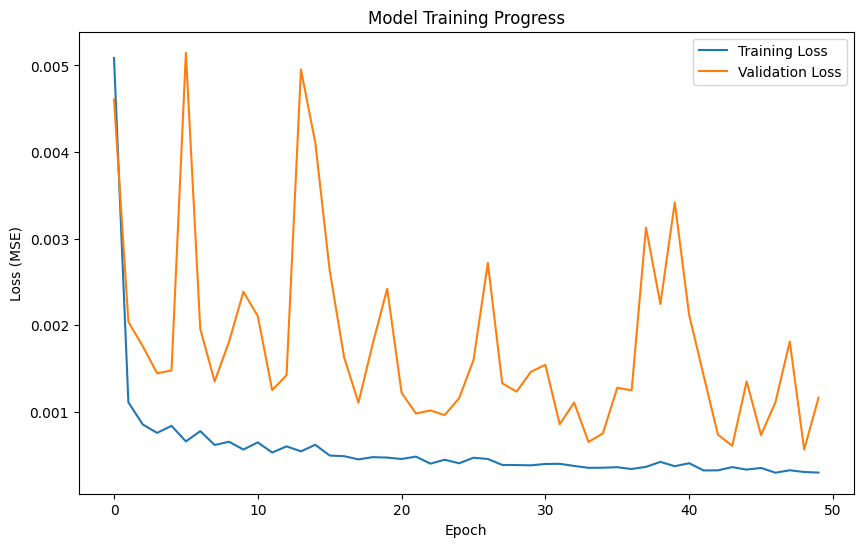

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step

--- LSTM Results ---
LSTM MAE: $1859.83
Baseline MAE: $1460.49 (Your target)
ANALYSIS: The LSTM struggled. We may need to tune hyperparameters.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1. Load Data
X = np.load('../data/processed/X.npy')
y = np.load('../data/processed/y.npy')
scaler = joblib.load('../data/processed/scaler.pkl')

# 2. Split Data (Time-based split)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"Train shape: {X_train.shape}")
print(f"Test shape:  {X_test.shape}")

# 3. Build the LSTM Architecture (Updated for Keras 3+)
model = Sequential()

# Explicit Input Layer
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

# Layer 1: More Neurons (128)
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.1)) # Lower dropout (0.2 -> 0.1) to let more info through

# Layer 2: More Neurons (128)
model.add(LSTM(units=128, return_sequences=False))
model.add(Dropout(0.1))

# Layer 3: Dense layers to process features before output
model.add(Dense(25)) # Intermediate layer
model.add(Dense(1))  # Final Prediction

# Compile with Custom Learning Rate
# Default is 0.001. Try 0.0005 to learn more carefully.
optimizer = Adam(learning_rate=0.0005) 
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

# 5. Define Callbacks
# Stop if validation loss doesn't improve for 5 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
# Save the best model automatically
checkpoint = ModelCheckpoint('../models/best_lstm_model.keras', monitor='val_loss', save_best_only=True)

# 6. Train the Model
print("\nStarting training...")
history = model.fit(
    X_train, y_train,
    epochs=50,             # Maximum runs (will likely stop early)
    batch_size=32,         # Update weights after every 32 samples
    validation_data=(X_test, y_test),
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# 7. Visualization of Training
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# 8. Evaluation
predictions = model.predict(X_test)

# Inverse transform to get real dollars
# (Same helper function as Week 3)
def inverse_transform_prediction(predictions, scaler):
    dummy = np.zeros((len(predictions), 7))
    dummy[:, 0] = predictions.flatten()
    rescaled = scaler.inverse_transform(dummy)
    return rescaled[:, 0]

real_predictions = inverse_transform_prediction(predictions, scaler)
real_actuals = inverse_transform_prediction(y_test, scaler)

from sklearn.metrics import mean_absolute_error
mae_lstm = mean_absolute_error(real_actuals, real_predictions)

print(f"\n--- LSTM Results ---")
print(f"LSTM MAE: ${mae_lstm:.2f}")
print(f"Baseline MAE: $1460.49 (Your target)")

if mae_lstm < 1460.49:
    print("SUCCESS: The LSTM beat the baseline!")
else:
    print("ANALYSIS: The LSTM struggled. We may need to tune hyperparameters.")

Conclusion: The LSTM model achieved an MAE of ~$1,860, which failed to beat the Linear Regression baseline ($1,375). The model appears to be overfitting or failing to capture the random-walk nature of the asset. Next Step: Move to Transformer architecture to test if Attention mechanisms handle this volatility better.